In [97]:
import numpy as np
from time_integrators import RK2, RK4, theta_scheme
import pylab as pl
%matplotlib inline

pl.style.use('latexplot')

In [98]:
# Defining the x-domain:
x_start = 0
x_end   = 40
N_x     = 400
dx      = (x_end - x_start) / N_x

# Number of ghost cells:
N_g     = 1
x       = x_start + (0.5 + np.arange(-N_g, N_x + N_g)) * dx

In [100]:
# Defining the time array:
t_final = 40
N_t     = 40001
t       = np.linspace(0, t_final, N_t)
dt      = t[1] - t[0]

In [30]:
# Defining the dimensionless concentration of species A:
a0 = x**0
b0 = 0 * a0
u0 = np.append(a0, b0)

In [55]:
# Ratio of diffusivities
D = 5

In [56]:
def apply_bcs(u, t):
    a = u[:(N_x + 2 * N_g)]
    b = u[(N_x + 2 * N_g):]

    # Applying the boundary conditions:
    a[0] = -a[1]
    # Boundary condition at x = infty
    a[-N_g:] = 1
    # Implementing boundary conditions
    b[:N_g]  = b[1] + (1/D)*(a[1] - a[0])
    b[-N_g:] = 0
   
    return np.append(a, b)

In [57]:
def du_dt(u, t):
    u = apply_bcs(u, t)
    a = u[:(N_x + 2 * N_g)]
    b = u[(N_x + 2 * N_g):]
    
    # Evaluating the 2nd derivative using central differences:
    d2a_dx2 = (np.roll(a, -1) + np.roll(a, 1) - 2 * a) / dx**2
    d2b_dx2 = (np.roll(b, -1) + np.roll(b, 1) - 2 * b) / dx**2
    
    return np.append(d2a_dx2, D * d2b_dx2)

In [58]:
# Evaluating the current:
I = np.zeros(t.size)
# Initial value of u:
u = u0
# Lists to store A, B:
A = []
B = []
for i in range(t.size - 1):
    if(t[i] % 10 < 1e-12):
        A.append(u[:(N_x + 2 * N_g)])
        B.append(u[(N_x + 2 * N_g):])

    u    = RK4(du_dt, u, t[i], t[i + 1])
    u    = apply_bcs(u, t)
    I[i] = (u[1] - u[0]) / dx

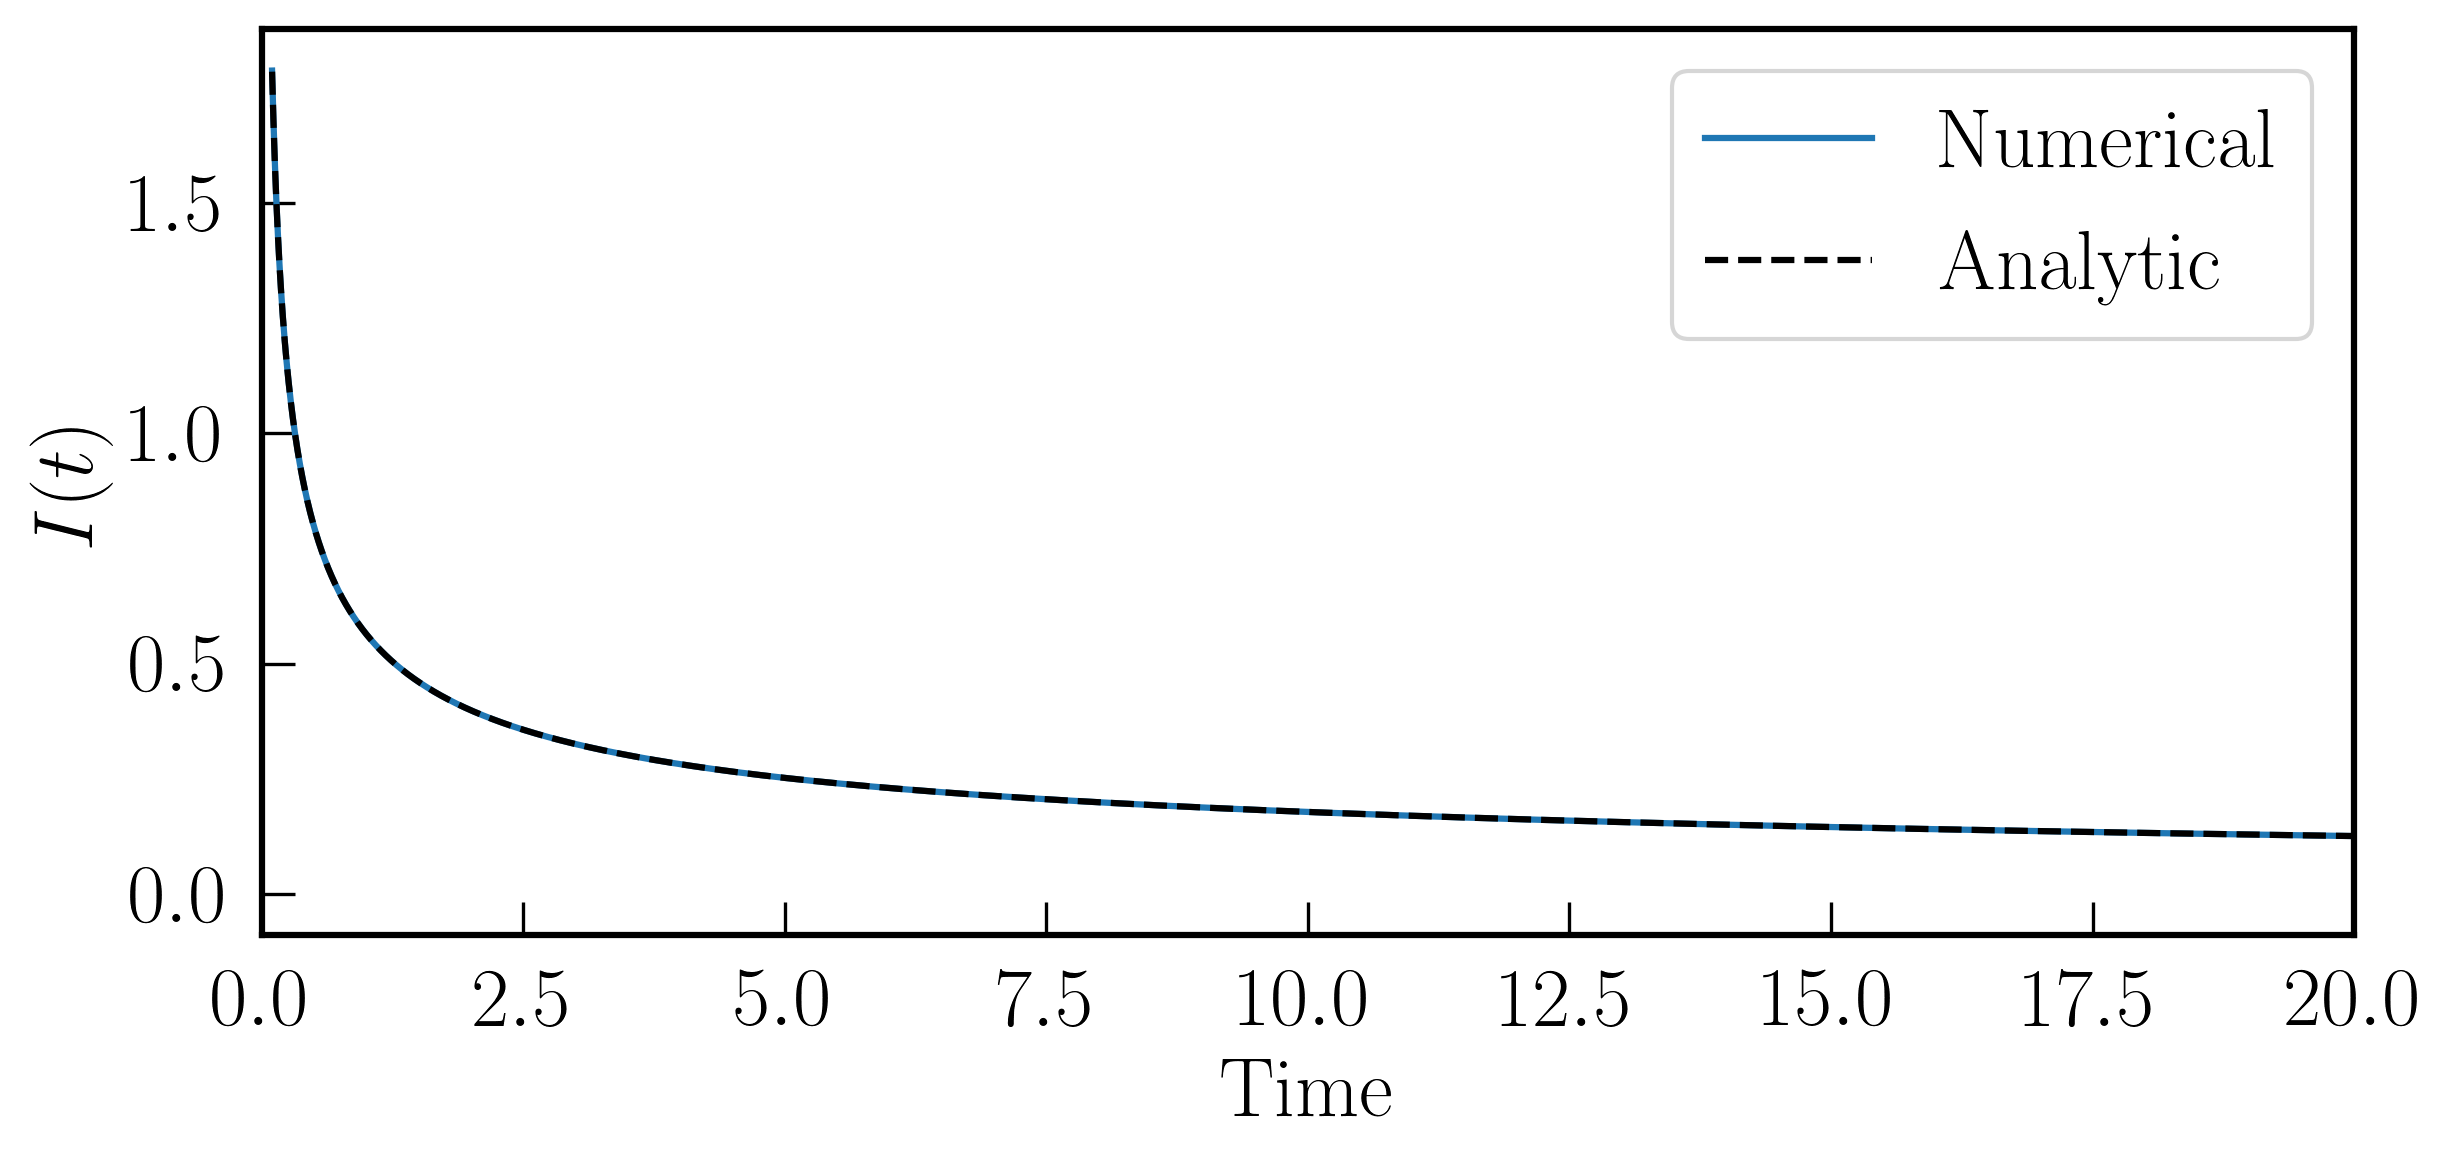

In [91]:
pl.plot(t[100:], I[100:], label = 'Numerical')
pl.plot(t[100:], 1 / np.sqrt(np.pi * t[100:]), 'k--', label = 'Analytic')
pl.ylabel(r'$I(t)$')
pl.xlabel('Time')
pl.xlim(0, 20)
pl.legend()
pl.savefig('current.png', bbox_inches = 'tight')

In [80]:
from scipy.special import erf, erfc

def a_analytic(x, t):
    return erf(0.5 * x / np.sqrt(t))
def b_analytic(x, t):
    return erfc(0.5 * x / np.sqrt(D * t))/np.sqrt(D)

/home/hyperion/miniconda3/envs/bolt/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


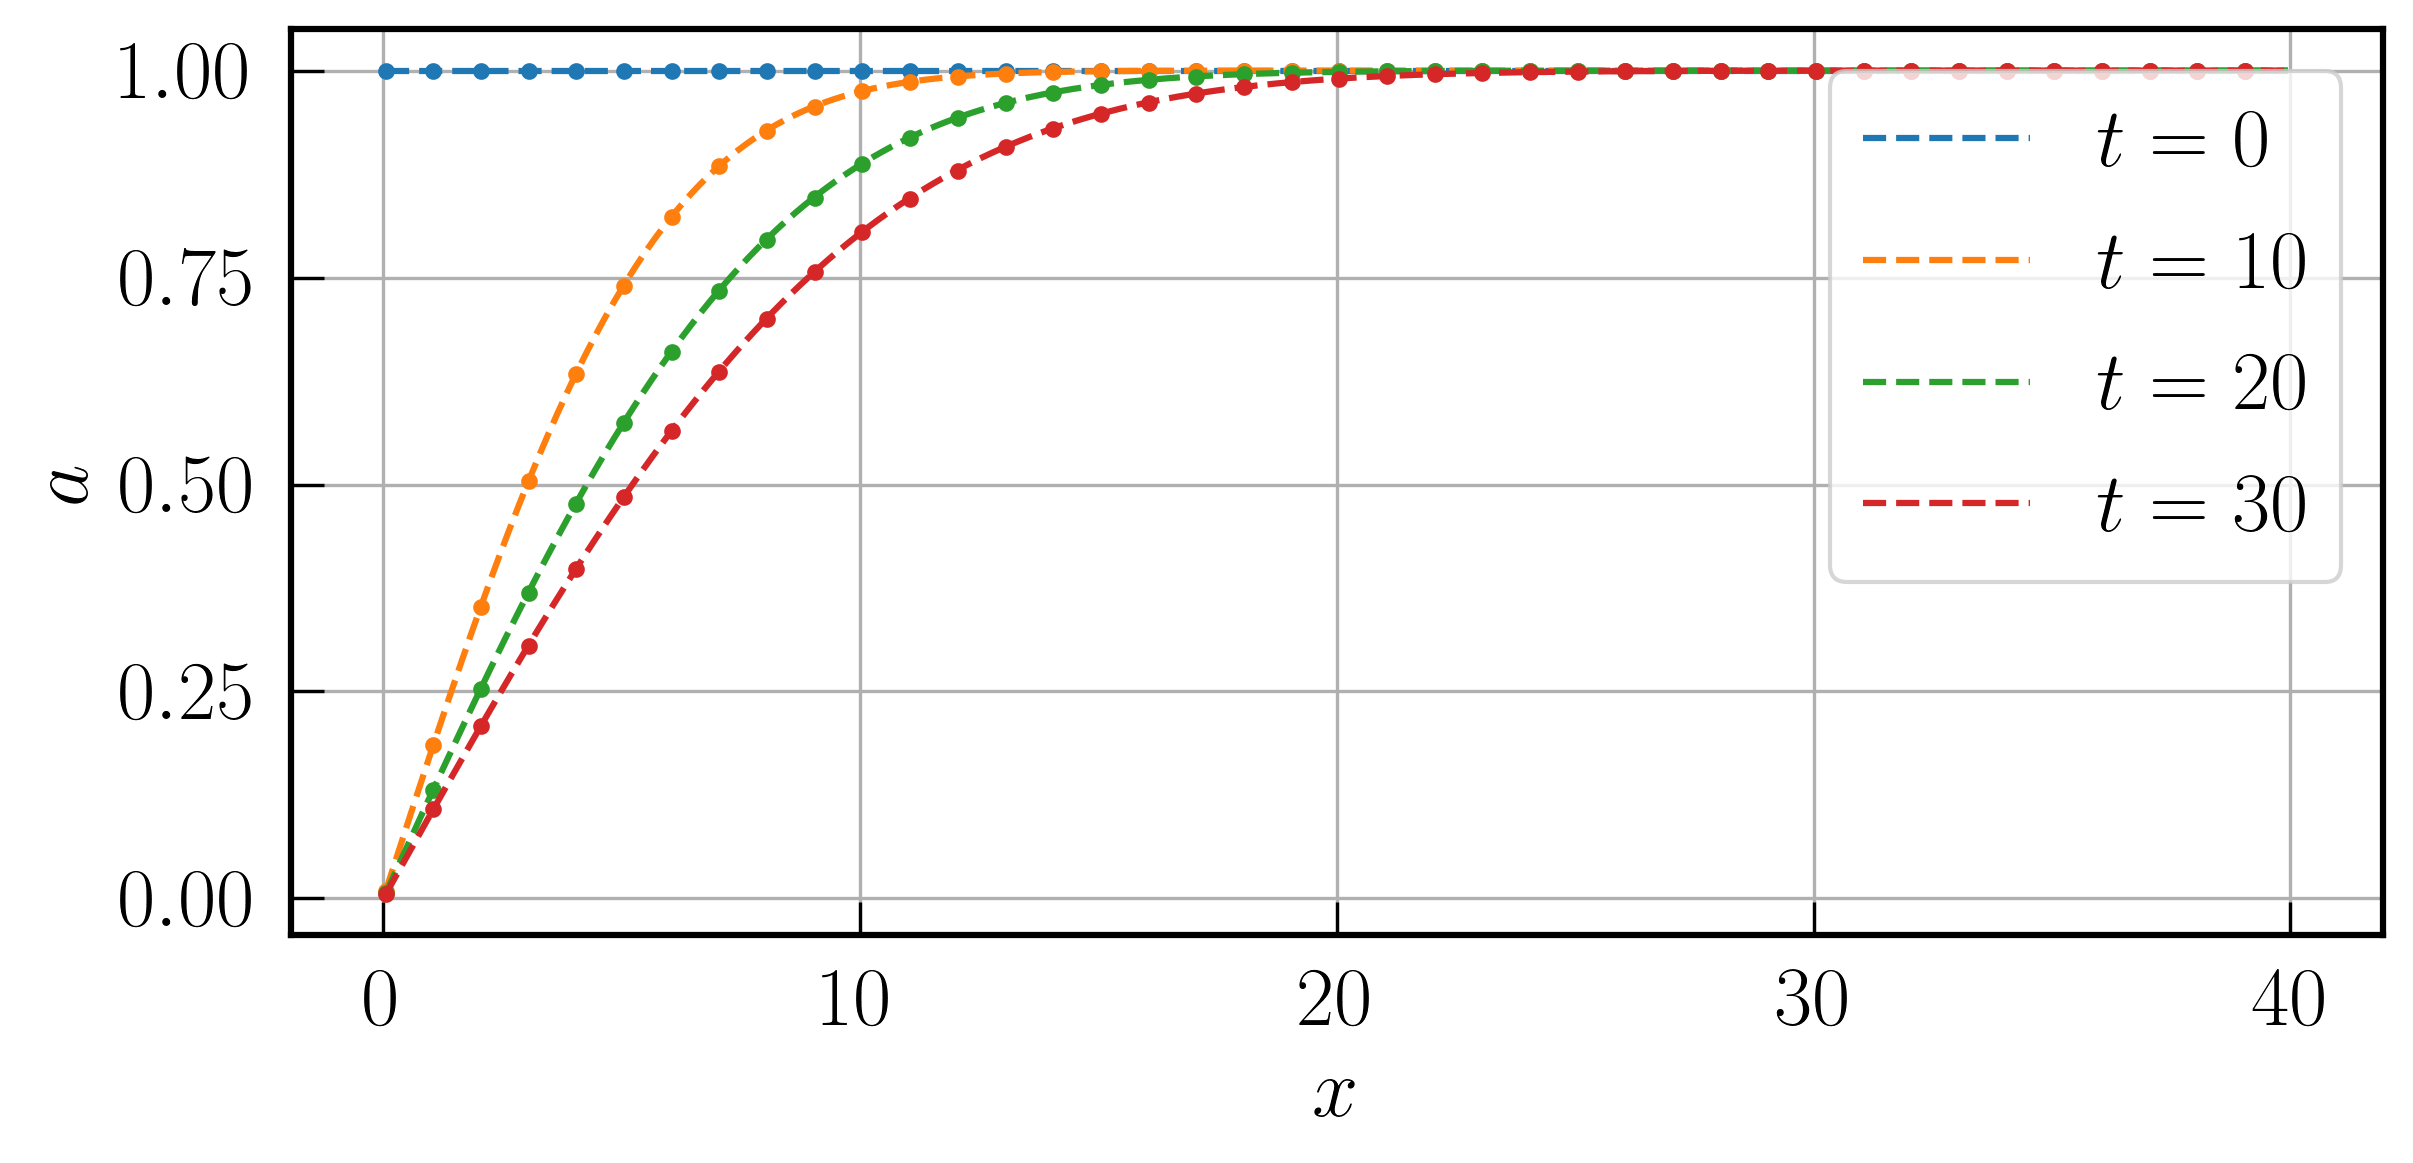

In [107]:
pl.plot(x[N_g:-N_g:10], (A[0])[N_g:-N_g-1:10], '.', color = 'C0')
pl.plot(x[N_g:-N_g], a_analytic(x[N_g:-N_g], 0), '--', label = r'$t = 0$', color = 'C0')

pl.plot(x[N_g:-N_g:10], (A[1])[N_g:-N_g-1:10], '.', color = 'C1')
pl.plot(x[N_g:-N_g], a_analytic(x[N_g:-N_g], 10), '--', label = r'$t = 10$', color = 'C1')

pl.plot(x[N_g:-N_g:10], (A[2])[N_g:-N_g-1:10], '.', color = 'C2')
pl.plot(x[N_g:-N_g], a_analytic(x[N_g:-N_g], 20), '--', label = r'$t = 20$', color = 'C2')

pl.plot(x[N_g:-N_g:10], (A[3])[N_g:-N_g-1:10], '.', color = 'C3')
pl.plot(x[N_g:-N_g], a_analytic(x[N_g:-N_g], 30), '--', label = r'$t = 30$', color = 'C3')

pl.ylabel(r'$a$')
pl.xlabel(r'$x$')
pl.legend()
pl.grid()
pl.savefig('a.png', bbox_inches = 'tight')

/home/hyperion/miniconda3/envs/bolt/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


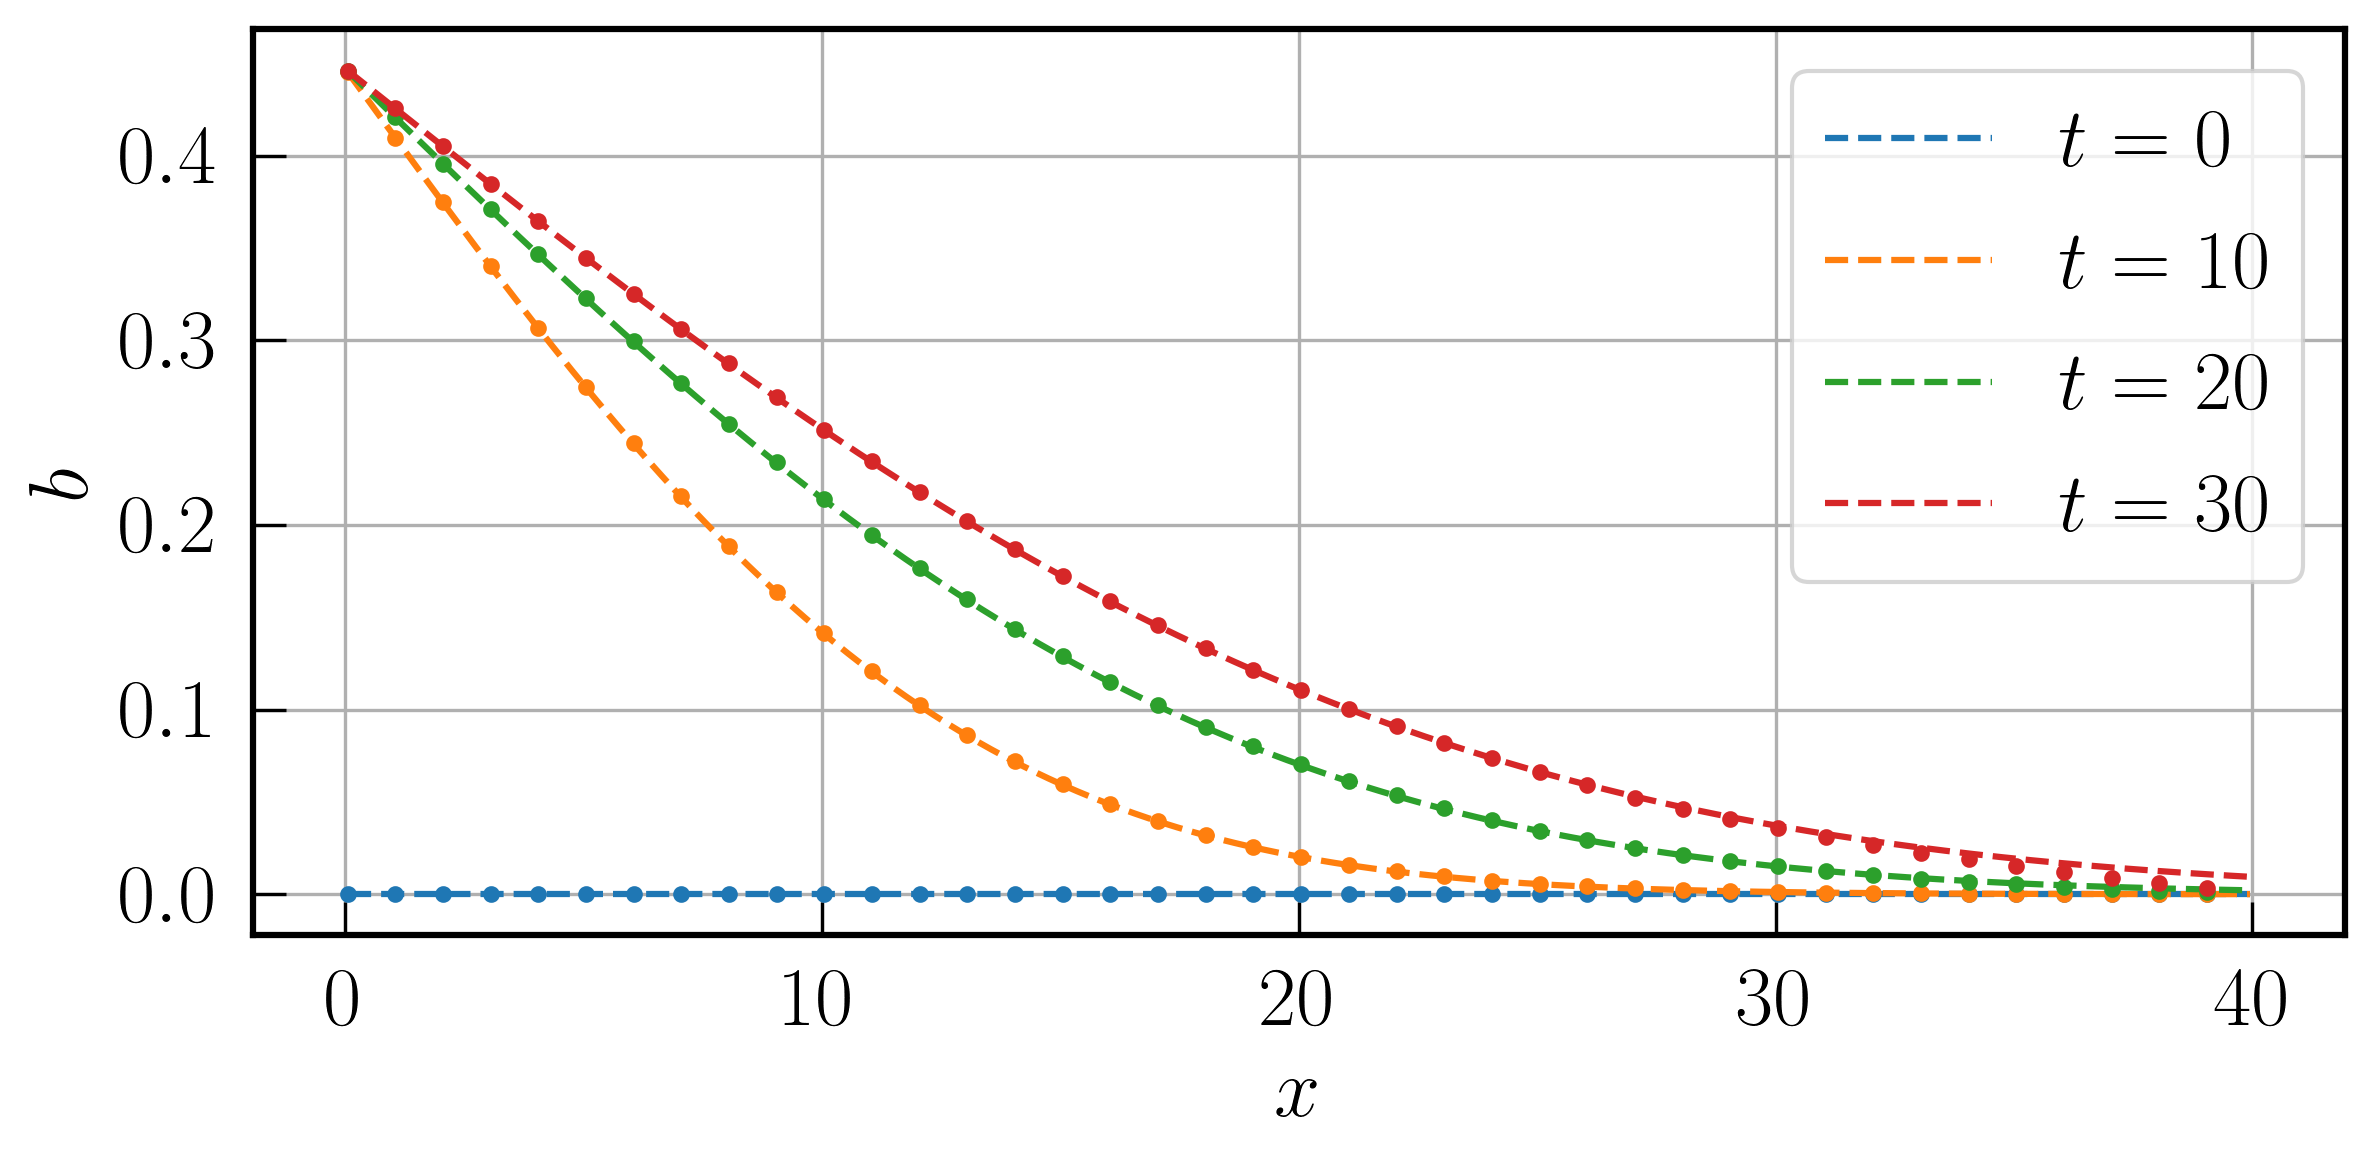

In [108]:
pl.plot(x[N_g:-N_g:10], (B[0])[N_g:-N_g-1:10], '.', color = 'C0')
pl.plot(x[N_g:-N_g], b_analytic(x[N_g:-N_g], 0), '--', label = r'$t = 0$', color = 'C0')

pl.plot(x[N_g:-N_g:10], (B[1])[N_g:-N_g-1:10], '.', color = 'C1')
pl.plot(x[N_g:-N_g], b_analytic(x[N_g:-N_g], 10), '--', label = r'$t = 10$', color = 'C1')

pl.plot(x[N_g:-N_g:10], (B[2])[N_g:-N_g-1:10], '.', color = 'C2')
pl.plot(x[N_g:-N_g], b_analytic(x[N_g:-N_g], 20), '--', label = r'$t = 20$', color = 'C2')

pl.plot(x[N_g:-N_g:10], (B[3])[N_g:-N_g-1:10], '.', color = 'C3')
pl.plot(x[N_g:-N_g], b_analytic(x[N_g:-N_g], 30), '--', label = r'$t = 30$', color = 'C3')

pl.ylabel(r'$b$')
pl.xlabel(r'$x$')
pl.legend()
pl.grid()
pl.savefig('b.png', bbox_inches = 'tight')

In [105]:
len(x)

402